# **Segmentación y Método del Codo**

# **1. Introducción**
En esta tarea, trabajaremos en la segmentación de empleados utilizando el algoritmo de clustering K-means, una técnica de aprendizaje no supervisado. El objetivo principal es identificar patrones en los datos que permitan categorizar a los empleados en grupos homogéneos basados en sus características. Estos grupos pueden ser utilizados para diseñar estrategias efectivas en áreas como retención de talento y desarrollo profesional.

Además, aplicaremos el método del codo para determinar el número óptimo de clusters. Este enfoque ayuda a encontrar el equilibrio entre cohesión dentro de los clusters y separación entre ellos.

## **1.2 Descripción de la tarea**
1. **Preprocesamiento de datos**:
   - Exploraremos las características relevantes del dataset.
   - Escalaremos las variables para garantizar que todas tengan un peso equitativo en el modelo.

2. **Determinación del número óptimo de clusters**:
   - Utilizaremos el método del codo para evaluar diferentes valores de \(k\) y seleccionar el más apropiado.

3. **Aplicación del modelo K-means**:
   - Entrenaremos el modelo K-means con el número óptimo de clusters.
   - Asignaremos etiquetas de cluster a los empleados en el dataset.

4. **Visualización de resultados**:
   - Generaremos gráficos 2D y 3D para analizar la distribución de los clusters.
   - Crearemos perfiles de los clusters basados en variables clave.


## **1.3 Descripción del dataset**
El dataset contiene información sobre empleados y sus características. Estas incluyen tanto variables numéricas como categóricas. A continuación, se detallan las principales columnas:

- **Variables numéricas**:
  - `edad`: Edad del empleado.
  - `cumplimiento_kpi`: Nivel de cumplimiento de indicadores clave de desempeño.
  - `puntaje_productividad`: Puntuación de productividad.
  - `puntaje_iniciativa`: Nivel de iniciativa del empleado.
  - `satisfaccion_laboral`: Nivel de satisfacción laboral (escala de 1 a 10).
  - `horas_capacitacion`: Horas de capacitación recibidas.
  - `puntaje_feedback_lider`: Calificación del feedback recibido de sus líderes.
  - `antiguedad`: Años de antigüedad en la empresa.
  - `promocion_ultimos_2_anos`: Indicador binario que señala si el empleado fue promovido en los últimos dos años (1: sí, 0: no).

- **Variables categóricas**:
  - `genero`: Género del empleado (Masculino/Femenino).
  - `nivel_educativo`: Nivel educativo alcanzado (Secundaria, Licenciatura, Maestría, Doctorado).
  - `balance_trabajo_vida`: Nivel de equilibrio entre trabajo y vida personal (Bajo, Medio, Alto).
  - `evaluacion_liderazgo`: Evaluación del liderazgo recibido (Bajo, Medio, Alto).
  - `categoria_desempeno`: Clasificación general del desempeño (Bajo, Medio, Alto).

## **1.4 Objetivo**
El análisis busca identificar patrones significativos que puedan ser útiles para las siguientes acciones:
- Diseñar programas de capacitación personalizados para mejorar el desempeño en clusters específicos.
- Identificar empleados con alto riesgo de abandono para implementar estrategias de retención.
- Detectar características comunes en empleados altamente productivos para replicar esos factores en otros grupos.

Este proceso apoyará a los responsables de recursos humanos a tomar decisiones basadas en datos y optimizar las políticas internas para el desarrollo y satisfacción de los empleados.


# **2. Importación de Librerías y Carga de datos**

### **2.1 Importar librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

### **2.2 Carga de datos**

In [2]:
# Cargar el dataset
data = pd.read_csv('https://raw.githubusercontent.com/emadrigals104/Analitica-de-RH/main/Semana1/dataset_segmentacion_empleados.csv')

In [3]:
# Vista inicial del dataset
print("Vista inicial del dataset:")
data.head()

Vista inicial del dataset:


,id_empleado,edad,genero,nivel_educativo,cumplimiento_kpi,puntaje_productividad,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,evaluacion_liderazgo,antiguedad,promocion_ultimos_2_anos,categoria_desempeno
0,E0001,50,Femenino,Licenciatura,72,76,90,10,Medio,46,1.3,Baja,2,1,Medio
1,E0002,36,Femenino,Licenciatura,59,72,100,2,Alto,8,1.5,Media,14,1,Alto
2,E0003,29,Masculino,Secundaria,60,73,75,10,Medio,9,3.6,Media,16,0,Alto
3,E0004,42,Femenino,Doctorado,90,58,61,5,Medio,7,2.4,Baja,13,0,Medio
4,E0005,40,Femenino,Maestría,90,84,44,6,Bajo,20,3.8,Media,15,0,Bajo


# **3. Exploración del Dataset**

### **3.1 Información General del Dataset**

En esta sección, exploramos las características generales del dataset para comprender su estructura y las variables disponibles. Usamos el método `data.info()` para obtener un resumen que incluye:

1. **Número de entradas (filas):** Cantidad total de registros en el dataset.
2. **Número de columnas:** Total de características (variables) incluidas en el dataset.
3. **Nombre y tipo de cada columna:** Identificación de cada columna y su tipo de datos (e.g., `int64`, `float64`, `object`).
4. **Valores no nulos:** Cantidad de datos válidos en cada columna, lo que permite detectar posibles valores faltantes.

Este análisis es fundamental para identificar:
- **Características categóricas o numéricas** que pueden necesitar preprocesamiento.
- **Valores faltantes** que podrían requerir técnicas de imputación.
- La estructura general del dataset, que guía las etapas posteriores del análisis.

In [4]:
print("Información del dataset:")
data.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_empleado               1000 non-null   object 
 1   edad                      1000 non-null   int64  
 2   genero                    1000 non-null   object 
 3   nivel_educativo           1000 non-null   object 
 4   cumplimiento_kpi          1000 non-null   int64  
 5   puntaje_productividad     1000 non-null   int64  
 6   puntaje_iniciativa        1000 non-null   int64  
 7   satisfaccion_laboral      1000 non-null   int64  
 8   balance_trabajo_vida      1000 non-null   object 
 9   horas_capacitacion        1000 non-null   int64  
 10  puntaje_feedback_lider    1000 non-null   float64
 11  evaluacion_liderazgo      1000 non-null   object 
 12  antiguedad                1000 non-null   int64  
 13  promocion_ultimos_2_anos  1000 non-null

## **3.2 Comprobación de Valores Nulos**

Verificamos si el dataset contiene valores nulos en alguna de sus columnas. Esto es crucial para determinar si es necesario realizar imputaciones o eliminar registros con datos faltantes.

In [5]:
# Comprobación de valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
id_empleado                 0
edad                        0
genero                      0
nivel_educativo             0
cumplimiento_kpi            0
puntaje_productividad       0
puntaje_iniciativa          0
satisfaccion_laboral        0
balance_trabajo_vida        0
horas_capacitacion          0
puntaje_feedback_lider      0
evaluacion_liderazgo        0
antiguedad                  0
promocion_ultimos_2_anos    0
categoria_desempeno         0
dtype: int64


## **3.3 Insights u observaciones (Sección 3)**
- El dataset está **completo y consistente**, con un total de **1000 registros y 15 columnas**, sin valores nulos.  
- Existen tanto **variables numéricas** (ej. `edad`, `cumplimiento_kpi`, `puntaje_iniciativa`) como **categóricas** (ej. `genero`, `nivel_educativo`, `balance_trabajo_vida`).  
- Esta mezcla de variables implica que será necesario aplicar **codificación y escalamiento** para los algoritmos de clustering.  
- El hecho de que no haya valores faltantes nos da un punto de partida **limpio y confiable** para el análisis posterior.  

# **4. Exploración de Datos (EDA)**

### **4.1 Resumen Estadístico de las Variables Numéricas**

Este código genera un resumen estadístico de las columnas numéricas del dataset, mostrando métricas como la media, desviación estándar, valores mínimos, máximos, y percentiles.

In [6]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
data.describe()

Estadísticas descriptivas:


,edad,cumplimiento_kpi,puntaje_productividad,puntaje_iniciativa,satisfaccion_laboral,horas_capacitacion,puntaje_feedback_lider,antiguedad,promocion_ultimos_2_anos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.947000,74.992000,74.957000,65.213000,5.564000,24.059000,2.927100,10.282000,0.214000
std,11.160858,14.974852,14.409469,20.422505,2.886215,14.470346,1.139691,5.502977,0.410332
min,22.000000,50.000000,50.000000,30.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,31.000000,62.000000,63.000000,47.000000,3.000000,12.000000,1.900000,5.000000,0.000000
50%,42.000000,75.000000,74.000000,66.000000,5.500000,24.000000,2.900000,10.000000,0.000000
75%,50.000000,88.000000,88.000000,83.000000,8.000000,36.000000,3.900000,15.000000,0.000000
max,59.000000,100.000000,100.000000,100.000000,10.000000,49.000000,5.000000,19.000000,1.000000


Este código tiene como objetivo explorar y visualizar las distribuciones de las variables numéricas en el dataset. Esto es importante porque:
- Permite identificar patrones y tendencias en los datos.
- Ayuda a detectar posibles problemas como valores atípicos, sesgos o distribuciones no normales.
- Proporciona una mejor comprensión de las características antes de aplicar el modelo de segmentación.


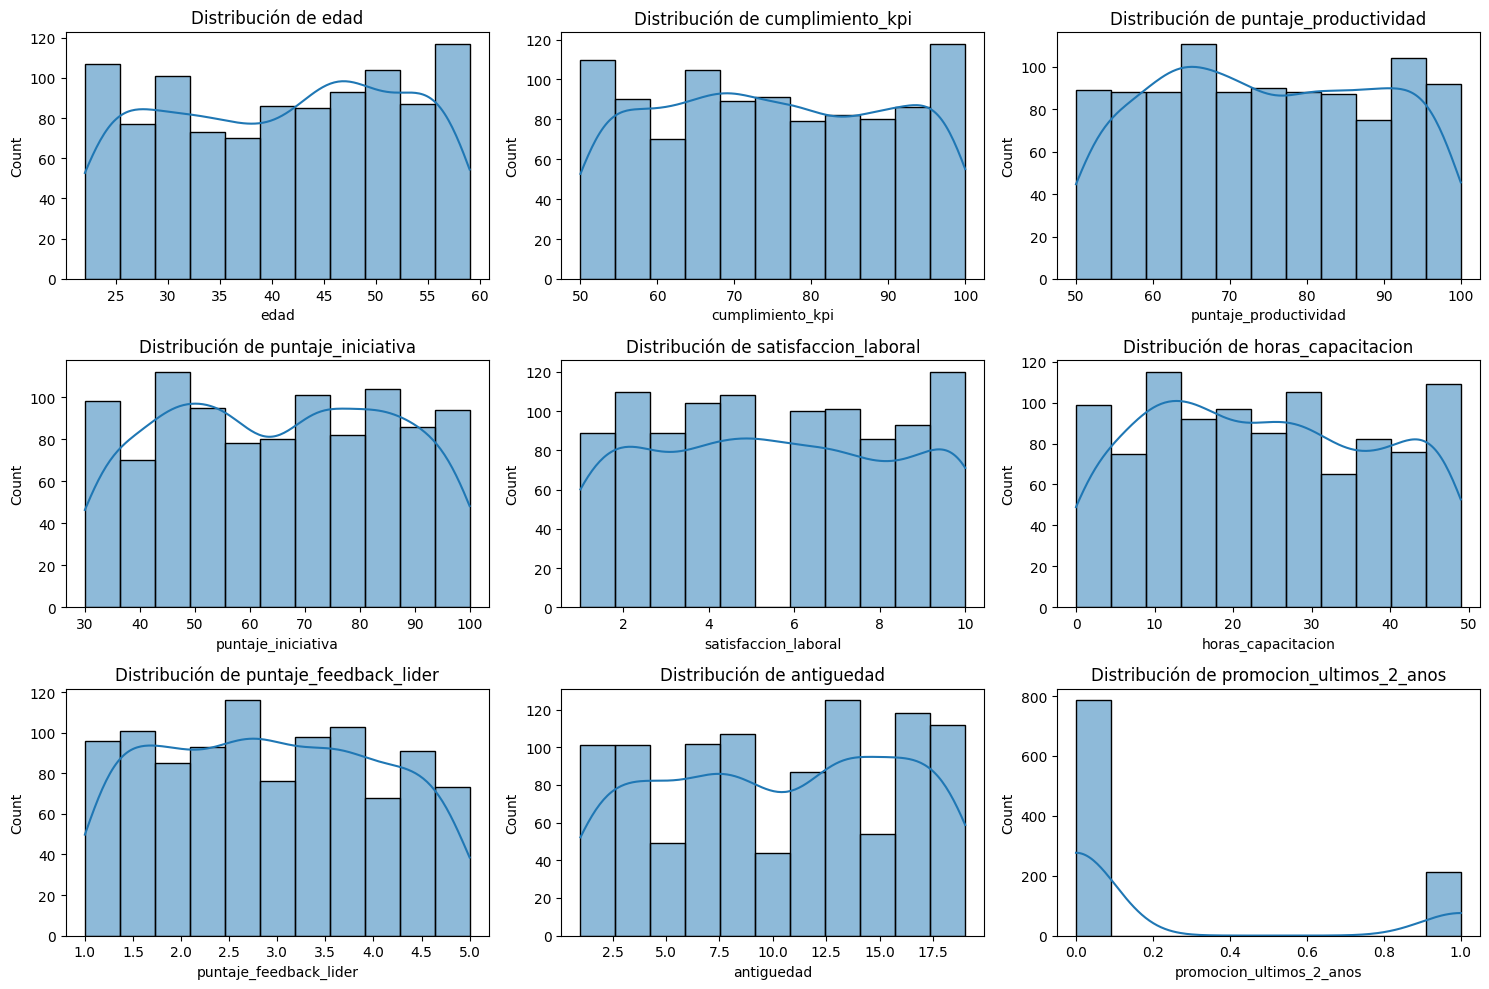

In [7]:
# Identificar columnas categóricas y numéricas
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Visualización de variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

## **4.2 Insights u Observaciones (Sección 4)**

- El dataset contiene **1,000 registros** y no presenta **valores nulos**, lo que facilita el análisis sin necesidad de imputaciones.  
- Las variables numéricas muestran diferentes escalas:  
  - **Edad** (22–59 años) y **antigüedad** (1–19 años) tienen distribuciones relativamente homogéneas.  
  - **Cumplimiento_kpi**, **puntaje_productividad** e **iniciativa** están en un rango de 50–100, con tendencia a valores altos.  
  - **Satisfacción laboral** se concentra alrededor de 5–6 en una escala de 1 a 10.  
  - **Horas de capacitación** tiene una media de ~24 horas, con dispersión amplia (0–49).  
  - **Feedback de líderes** se concentra en valores medios (2–4 en escala 1–5).  
- La variable **promocion_ultimos_2_anos** es **binaria y desbalanceada**: solo el **21.4%** de los empleados fueron promovidos, lo que refleja que es un evento poco frecuente.  
- Estas características sugieren que, para análisis posteriores (como clustering), será **necesario escalar/normalizar** las variables numéricas para evitar que unas dominen sobre otras.  


# **5. El Método del Codo (Elbow Method)**

El Método del Codo es una técnica utilizada para determinar el número óptimo de clústeres en algoritmos de agrupamiento como K-Means. Ayuda a identificar el punto donde agregar más clústeres no proporciona una mejora significativa en la variabilidad explicada por el modelo, evitando así el sobreajuste.

Concepto Básico
En el algoritmo K-Means, el objetivo es minimizar la suma de las distancias al cuadrado (SSE, Sum of Squared Errors) entre los puntos de datos y sus respectivos centroides de clústeres:

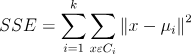

Donde:

* 𝑘 es el número de clústeres.
* 𝐶𝑖 es el conjunto de puntos en el clúster 𝑖.
* 𝜇𝑖 es el centroide del clúster 𝑖.
*   es la distancia euclidiana al cuadrado entre el punto 𝑥 y el centroide 𝜇𝑖.


## **5.1 Procedimiento del Método del Codo**
1. **Ejecutar el algoritmo de agrupamiento** (por ejemplo, K-Means) para diferentes valores de 𝑘 (número de clústeres), típicamente en un rango de 1 a 10 o más.

2. **Calcular la SSE** para cada valor de 𝑘. Esto implica calcular la suma de las distancias al cuadrado de cada punto al centroide de su clúster.

3. **Graficar el SSE contra el número de clústeres 𝑘:**

* En el eje X: Número de clústeres 𝑘.
* En el eje Y: SSE correspondiente.

4. **Identificar el "codo" en la gráfica:**

* El punto donde la disminución de SSE se vuelve menos pronunciada.
* Representa el número óptimo de clústeres, ya que agregar más clústeres no resulta en una mejora significativa de la variabilidad explicada.

## **5.2 Implementación del Método del Codo**


In [8]:
from sklearn.cluster import KMeans

In [9]:
# Seleccionar todas las columnas numéricas
X_numerics = data.select_dtypes(include='number')

In [10]:
X_numerics.head()

,edad,cumplimiento_kpi,puntaje_productividad,puntaje_iniciativa,satisfaccion_laboral,horas_capacitacion,puntaje_feedback_lider,antiguedad,promocion_ultimos_2_anos
0,50,72,76,90,10,46,1.3,2,1
1,36,59,72,100,2,8,1.5,14,1
2,29,60,73,75,10,9,3.6,16,0
3,42,90,58,61,5,7,2.4,13,0
4,40,90,84,44,6,20,3.8,15,0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numerics_scaled = scaler.fit_transform(X_numerics)

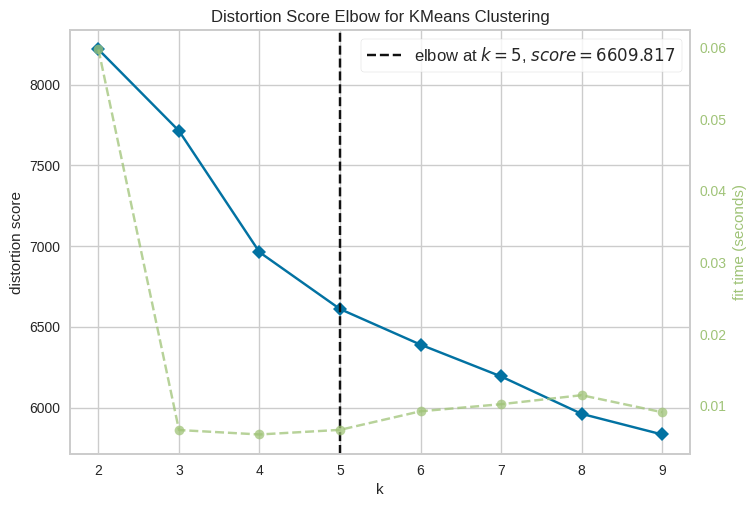

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Calcular la inercia para diferentes cantidades de clústeres
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans(random_state=1)
visual = KElbowVisualizer(modelo, k=(2,10))

visual.fit(X_numerics_scaled)
visual.show()


## **5.3 Insights u Observaciones (Sección 5)**
- El **método del codo** aplicado sobre las variables numéricas sugiere que el número óptimo de clusters es **k = 5**, ya que a partir de este punto la reducción de la inercia (SSE) deja de ser significativa.  
- Esto indica que existen aproximadamente **5 grupos naturales** en los datos de empleados, cada uno con patrones y características homogéneas.  
- El **preprocesamiento con StandardScaler** fue esencial, ya que permitió que todas las variables contribuyeran equitativamente a la distancia euclidiana. Sin este paso, variables con valores más grandes (ej. edad, puntaje_productividad) dominarían el clustering.  
- El valor de **SSE en k=5 (~6609)** representa un balance adecuado entre simplicidad del modelo y capacidad de explicación.  
- Este resultado establece la base para la siguiente fase: **aplicar K-means con k=5** para segmentar a los empleados y analizar los perfiles de cada cluster.  


#  **6. Aplicación de K-means**

## **6.1 ¿Qué es K-means?**

El algoritmo de agrupación particional más conocido es K-Means. Se desarrolló de forma independiente en muchos lugares en los años 50 y 60 y ganó gran popularidad debido a su facilidad de implementación, simplicidad y muchos éxitos empíricos (por ejemplo, en negocios, medicina y ciencia).


Hay 3 pasos principales en el algoritmo K-Means (conocido también como algoritmo de Lloyd's):

1. Divida las muestras en grupos iniciales mediante el uso de puntos de semilla. Las muestras más cercanas a estos puntos de semilla crearán grupos iniciales.
2.	Calcule las distancias de las muestras a los puntos centrales de los grupos (centroides) y asigne las muestras más cercanas a su clúster.
3.	El tercer paso es calcular los centroides de clúster recién creados (actualizados).

A continuación, repita los pasos 2 y 3 hasta que el algoritmo converja.

Como se mencionó anteriormente, el objetivo de K-Means es minimizar la función objetiva (inercia) en todos los grupos. La función objetivo se define como:

Esto se conoce como problema NP-hard, lo que significa que este es un algoritmo codicioso y converge al mínimo local. El costo computacional del algoritmo K-Means de Lloyd es O(kn), donde k es un número de cúmulos y n es un número de muestras. Esto no está mal en comparación con otros algoritmos de agrupación. A pesar de converger generalmente a un mínimo local, la media K es relativamente rápida y cuando los grupos están bien aislados entre sí es probable que converja al mínimo global. Debido a que el resultado de la agrupación depende de los criterios de inicialización, es común ejecutar el análisis para varios puntos de inicialización y elegir el que tenga una inercia resultante mínima. Hay algunas mejoras en el algoritmo que resuelve el problema de los mínimos locales.

En general, se requiere que un usuario del algoritmo K-Means defina tres parámetros principales:

1. **Criterios de inicialización**
En scikit-learn, se implementa un esquema de inicialización inteligente: "k-means++" propuesto por Arthur y Vassilvitskii. Crea centroides iniciales generalmente distantes entre sí aumentando la probabilidad de obtener mejores resultados. También existe la posibilidad de utilizar un generador de puntos aleatorios. Hay esfuerzos en curso para crear el método de siembra más eficiente para el algoritmo K-Means, uno de ellos se basa en el análisis de componentes independientes.

2. **El numero de cluster**
que seleccionan varios clústeres es la parte más difícil de configurar este algoritmo. No hay criterios matemáticos estrictos para esto y se han desarrollado muchos enfoques heurísticos / simplificados. Uno de los más simples y populares es el método del codo que se muestra en este análisis. Además, también se utilizará una puntuación de silueta. También hay otras opciones, a menudo avanzadas, para elegir el número óptimo de clústeres (sin embargo, no se utilizan en este portátil y no se implementan en sklearn).

* Longitud Minima del Mensaje (MML)
* Longitud minima descripcion (CDM)
* Criterio de informacion de Bayes (BIC)
* Akaike Information Criterion (AIC)
* Proceso de Dirichlet
* Estadisticas de Brechas

**Conclusiones sobre Kmeans:**
1.	Se utilizan distancias euclidianas
2.	Se debe definir el número de clústeres para el algoritmo
3.	El centroide se calcula utilizando la distancia media a los miembros del clúster
4.	Los clusters se asumen isotrópicos y convexos
5.	Algoritmo estocástico: los resultados dependen de los criterios de inicialización
6.	Crea grupos de varianza igual (minimiza la inercia)
7.	Propenso a la "maldición de la dimensionalidad"
8.	Se puede ejecutar en paralelo, por lo que escala bien



## **6.2 Implementación de K-means**

Se aplica el modelo de clustering K-means al dataset utilizando el número óptimo de clusters previamente determinado. Este paso asigna una etiqueta de cluster a cada empleado en función de sus características, lo que nos permite analizar los grupos resultantes.

**Determinación del número de clusters**:
   - El número de clusters óptimo (\(k\)) se ha determinado visualmente utilizando el método del codo o alguna métrica de evaluación.
   - En este caso, se seleccionó \(k = 5\).

In [13]:
# Aplicar K-means con el número óptimo de clústeres (determinado visualmente)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numerics_scaled)

# Agregar etiquetas de clústeres al dataset original
data_kmeans = data.copy()
data_kmeans['Cluster'] = clusters

print("Distribución de empleados por clúster:")
print(data_kmeans['Cluster'].value_counts())

Distribución de empleados por clúster:
Cluster
4    216
3    214
2    205
0    183
1    182
Name: count, dtype: int64


## **6.3 Visualización de Resultados**

La visualización de resultados permite interpretar y comunicar los patrones identificados en los clústeres.


Estadísticas descriptivas por clúster:


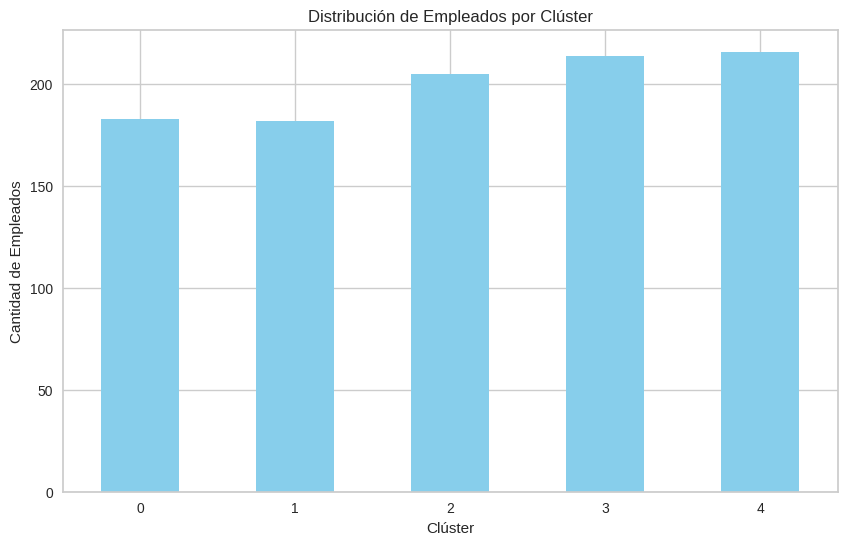

In [14]:
# Perfil del clúster
print("\nEstadísticas descriptivas por clúster:")
data_kmeans.groupby('Cluster')[numerical_cols].mean()

# Comparación entre clústeres
plt.figure(figsize=(10, 6))
data_kmeans.groupby('Cluster').size().plot(kind='bar', color='skyblue')
plt.title("Distribución de Empleados por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Empleados")
plt.xticks(rotation=0)
plt.show()


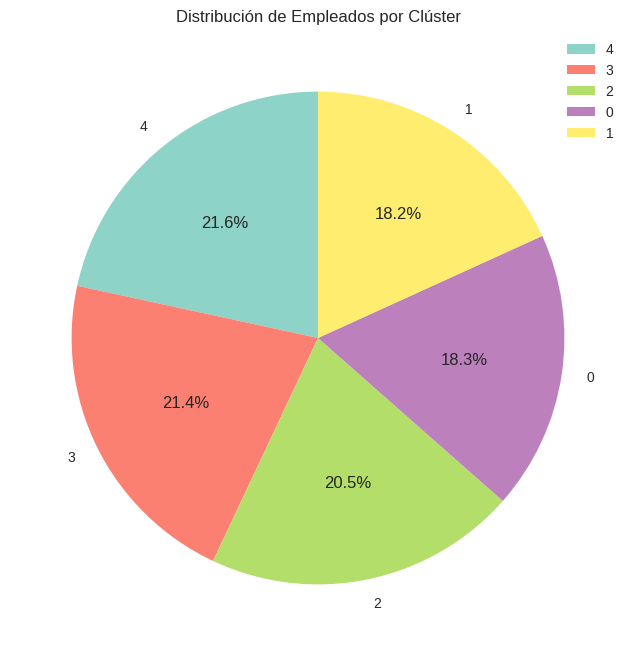

In [15]:
# Gráfico de pie para el tamaño de los clusters
plt.figure(figsize=(8, 8))
data_kmeans['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', legend=True)
plt.title("Distribución de Empleados por Clúster")
plt.ylabel('')
plt.show()


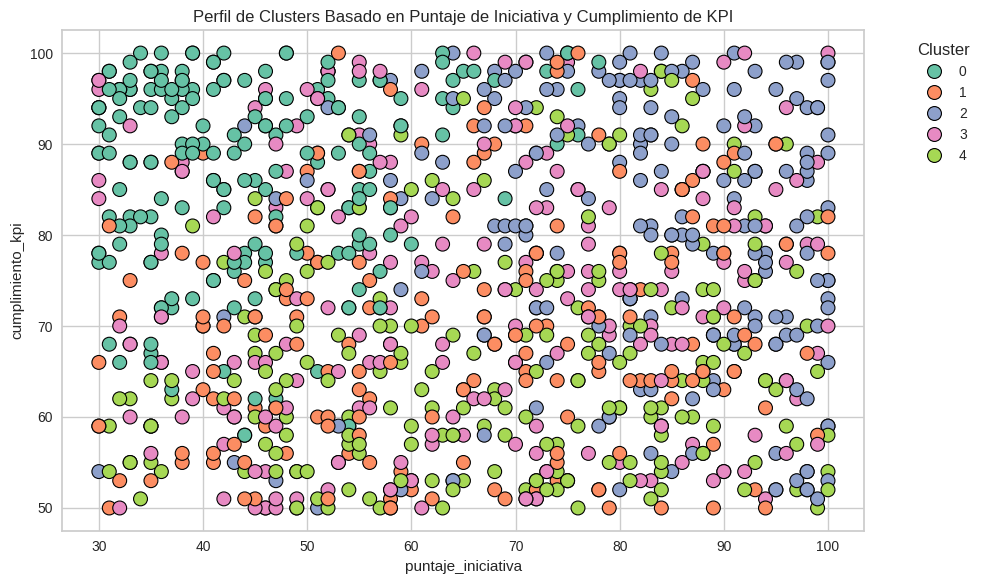

In [16]:
# Gráfico 2D de clusters para dos variables relevantes
plt.figure(figsize=(10, 6))
pl = sns.scatterplot(
    data=data_kmeans,
    x='puntaje_iniciativa',
    y='cumplimiento_kpi',
    hue='Cluster',
    palette='Set2',
    s=100,
    edgecolor='black'
)
pl.set_title("Perfil de Clusters Basado en Puntaje de Iniciativa y Cumplimiento de KPI")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


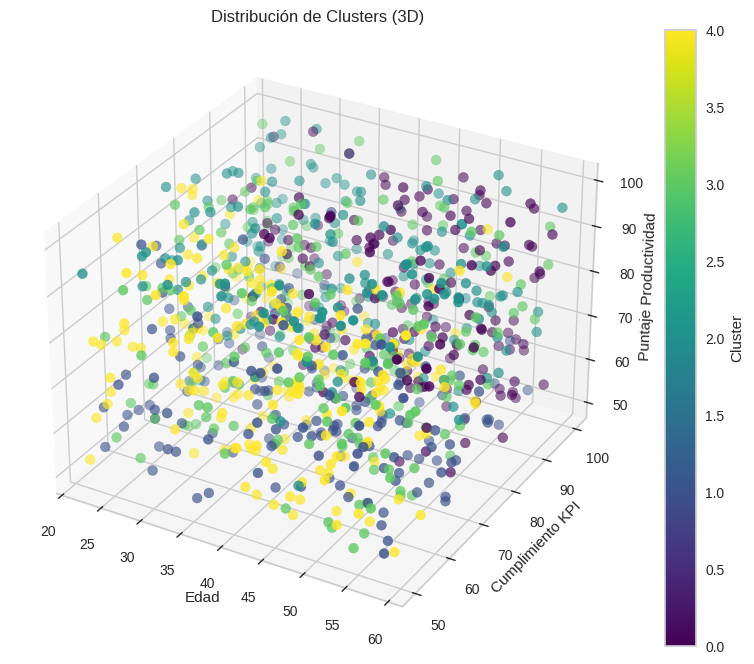

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar tres características representativas
x = data_kmeans['edad']
y = data_kmeans['cumplimiento_kpi']
z = data_kmeans['puntaje_productividad']

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=data_kmeans['Cluster'], s=50, cmap='viridis', marker='o')
ax.set_title("Distribución de Clusters (3D)")
ax.set_xlabel('Edad')
ax.set_ylabel('Cumplimiento KPI')
ax.set_zlabel('Puntaje Productividad')
plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()


In [18]:
import plotly.graph_objs as go
import plotly.offline as py

def tracer(db, cluster_id, name, x_col, y_col, z_col):
    '''
    Devuelve un objeto de seguimiento para Plotly basado en un cluster específico
    '''
    return go.Scatter3d(
        x = db[db['Cluster'] == cluster_id][x_col],
        y = db[db['Cluster'] == cluster_id][y_col],
        z = db[db['Cluster'] == cluster_id][z_col],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
    )

# Seleccionar tres variables representativas
x_col = 'edad'
y_col = 'satisfaccion_laboral'
z_col = 'puntaje_productividad'

# Crear trazas para cada cluster
traces = []
for cluster_id in range(n_clusters):
    traces.append(tracer(data_kmeans, cluster_id, f'Cluster {cluster_id}', x_col, y_col, z_col))

# Crear layout
layout = go.Layout(
    title = 'Clusters por K-Means',
    scene = dict(
        xaxis = dict(title = 'Edad'),
        yaxis = dict(title = 'Satisfacción Laboral'),
        zaxis = dict(title = 'Puntaje de Productividad')
    )
)

# Crear figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar gráfico
py.offline.iplot(fig)


## **6.4 Insights u Observaciones (Sección 6)**

- **Número de clústeres óptimo:**  
  - A través del **método del codo**, se determinó que el valor óptimo es **k = 5**, lo que indica que los empleados pueden segmentarse en **cinco grupos homogéneos**.  

- **Distribución de empleados por clúster:**  
  - Los grupos son de tamaño **relativamente balanceado**:  
    - Clúster 0: 183 empleados  
    - Clúster 1: 182 empleados  
    - Clúster 2: 205 empleados  
    - Clúster 3: 214 empleados  
    - Clúster 4: 216 empleados  
  - Esto sugiere que no existe un **desequilibrio severo** en la segmentación, lo cual facilita un análisis comparativo más justo entre clústeres.

- **Visualización y separación de clústeres:**  
  - En gráficos 2D (por ejemplo, `puntaje_iniciativa` vs `cumplimiento_kpi`) y 3D (agregando `edad`), los clústeres muestran cierta **superposición**, pero aun así se aprecian **zonas diferenciadas de densidad** que validan la segmentación.  
  - Variables como **puntaje de iniciativa, cumplimiento de KPIs y productividad** parecen ser **factores clave** en la separación de clústeres.

- **Interpretación preliminar de los grupos:**  
  - Aunque todavía no se han perfilado a fondo, los clústeres probablemente reflejan combinaciones de **alto desempeño**, **desempeño medio estable** y **grupos con necesidad de intervención** (bajo cumplimiento o baja iniciativa).  
  - La segmentación permitirá a RR.HH. diseñar **estrategias diferenciadas** para cada grupo (formación, reconocimiento, planes de carrera).

- **Relevancia práctica:**  
  - La identificación de 5 clústeres ofrece un **equilibrio entre simplicidad y detalle**, permitiendo a los analistas y responsables de RR.HH. **interpretar los patrones** y actuar en consecuencia.  
  - Este paso prepara el terreno para la construcción de **perfiles detallados de clústeres** en fases posteriores del análisis.


# **7. DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) y muestra su implementación a la segmentación de clientes de centros comerciales.

**7.1 Descripción**

DBSCAN significa Agrupación espacial basada en la densidad de aplicaciones con ruido y es uno de los algoritmos de agrupación en clústeres implementados en la biblioteca scikit-learn. Fue propuesto por Martin Ester, Hans-Peter Kriegel, Jörg Sander y Xiaowei Xu en 1996 en su famoso artículo "A Density-Based Algorithm for Discovering Clusters in Large Spatial Database with Noise".
Como el nombre del documento sugiere, la idea central de DBSCAN gira en torno al concepto de regiones densas. La suposición es que los cúmulos naturales están compuestos de puntos densamente ubicados. Esto requiere la definición de "región densa". Para ello se requieren dos parámetros para el algoritmo DBSCAN.

*	Eps, ε - distancia
*	MinPts - Número mínimo de puntos a distancia Eps

Opcionalmente, la métrica de distancia puede ser especificada por un usuario, pero generalmente se implementa la distancia euclidiana (como en scikit learn).
Por lo tanto, una "región densa" es creada por un número mínimo de puntos dentro de la distancia entre todos ellos, Eps. Los puntos que se encuentran dentro de esta distancia pero no cerca del número mínimo de otros puntos se tratan como "puntos fronterizos". Los restantes son ruido o valores atípicos. Esto se muestra en la imagen de abajo (para MinPts=3). Los puntos rojos (D) se encuentran en una "región densa": cada uno tiene un mínimo de 3 vecinos dentro de la distancia Eps. Los puntos verdes (B) son fronterizos: tienen un vecino a poca distancia Pero menos de 3. El punto azul (O) es un valor atípico: no hay vecinos a poca distancia Eps.



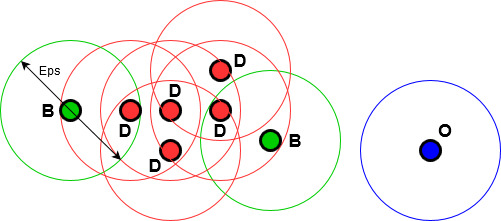

Ventajas de este enfoque:

1.	encuentra el número de clústeres en sí, basándose en los parámetros eps y MinPts
2.	Puede diferenciar grupos alargados o grupos rodeados por otros grupos en contra de, por ejemplo, K-Means donde los cúmulos son siempre convexos.
3.	También es capaz de encontrar puntos que no encajan en ningún clúster: detecta valores atípicos.

El mayor inconveniente de DBSCAN:

1.	Alto gasto computacional de O(n log(n)) promedio proveniente de la necesidad de ejecutar una consulta de vecindad para cada punto.
2.	Identifica mal los grupos con varias densidades


En DBSCAN hay dos hiperparámetros principales:

1.	Eps
2.	min_samples

Es difícil decir arbitrariamente qué valores funcionarán mejor. Por lo tanto, primero crearé una matriz de combinaciones investigadas.

In [19]:
from itertools import product

eps_values = np.arange(1,2.25,0.25) # valores eps a investigar
min_samples = np.arange(1,10) # min_samples valores a investigar

DBSCAN_params = list(product(eps_values, min_samples))

Debido a que DBSCAN crea clústeres en sí mismo en función de esos dos parámetros, verifiquemos la cantidad de clústeres generados.

In [20]:
from sklearn.metrics import silhouette_score

no_de_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics_scaled)
    labels = DBS_clustering.labels_
    n_clusters = len(np.unique(labels))

    # Solo calcular la puntuación si hay más de un cluster
    if n_clusters > 1:
        sil_score.append(silhouette_score(X_numerics_scaled, labels))
    else:
        sil_score.append(-1)

    no_de_clusters.append(n_clusters)

Un diagrama de calor a continuación muestra cuántos clústeres generó el algoritmo DBSCAN para las combinaciones de parámetros respectivas.

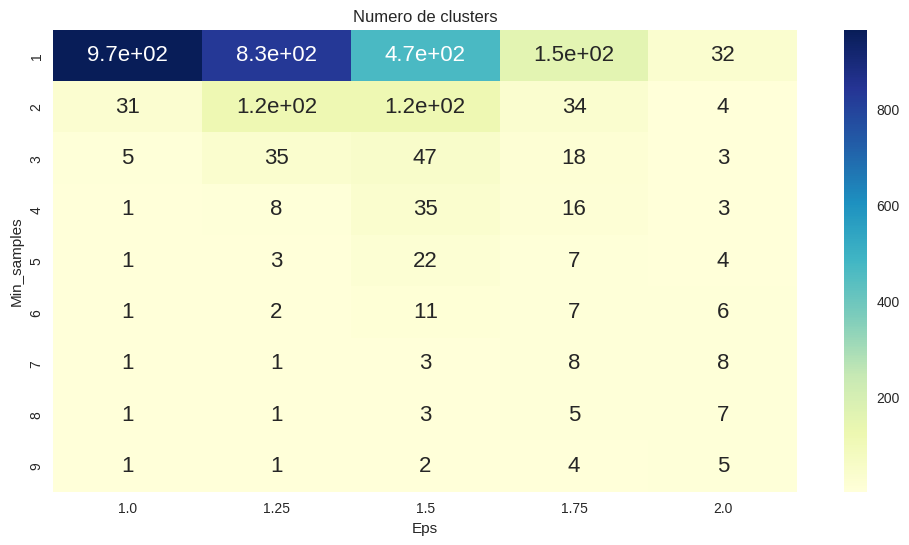

In [21]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_de_clusters'] = no_de_clusters

pivot_1 = pd.pivot_table(tmp, values='No_de_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Numero de clusters')
plt.show()

Para decidir qué combinación elegir, usaré una métrica: una puntuación de silueta y la trazaré nuevamente como un mapa de calor.

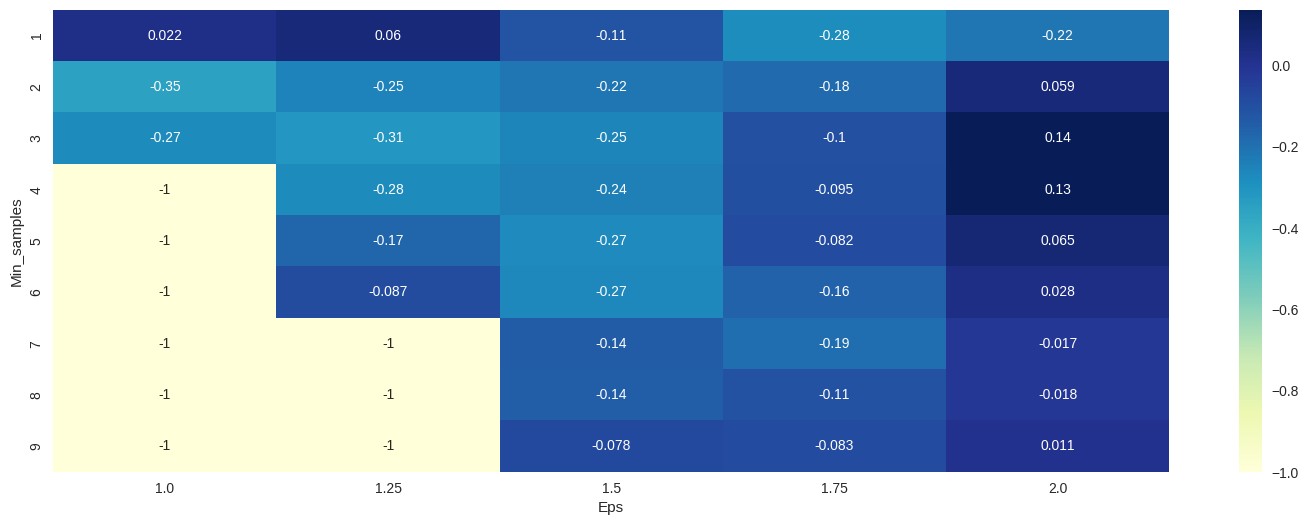

In [22]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Entrenamiento de DBSCAN

In [23]:
dbscan = DBSCAN(eps=2,min_samples=3).fit(X_numerics_scaled)
data_dbscan = data.copy()
data_dbscan['cluster'] = dbscan.labels_
data_dbscan.head()

,id_empleado,edad,genero,nivel_educativo,cumplimiento_kpi,puntaje_productividad,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,evaluacion_liderazgo,antiguedad,promocion_ultimos_2_anos,categoria_desempeno,cluster
0,E0001,50,Femenino,Licenciatura,72,76,90,10,Medio,46,1.3,Baja,2,1,Medio,0
1,E0002,36,Femenino,Licenciatura,59,72,100,2,Alto,8,1.5,Media,14,1,Alto,0
2,E0003,29,Masculino,Secundaria,60,73,75,10,Medio,9,3.6,Media,16,0,Alto,1
3,E0004,42,Femenino,Doctorado,90,58,61,5,Medio,7,2.4,Baja,13,0,Medio,1
4,E0005,40,Femenino,Maestría,90,84,44,6,Bajo,20,3.8,Media,15,0,Bajo,1


Comprobación de tamaños de clústeres.

In [24]:
print(data_dbscan['cluster'].value_counts())

cluster
 1    777
 0    192
-1     31
Name: count, dtype: int64


## **7.2 Visualización de resultados de DBSCAN**

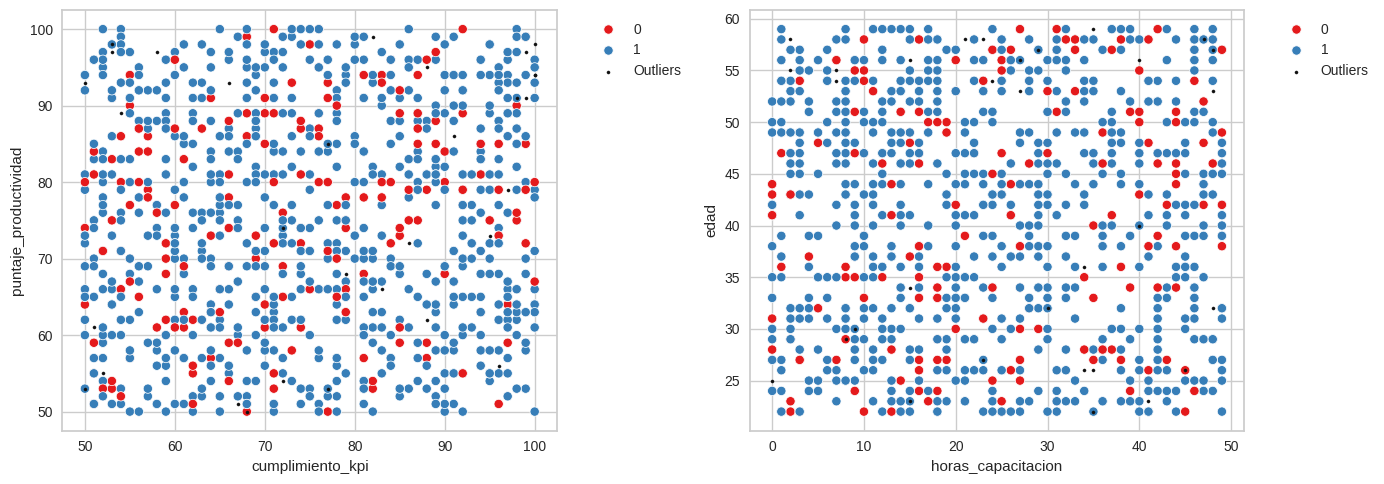

In [25]:
# Filtrar los outliers (ruido) del cluster -1
outliers = data_dbscan[data_dbscan['cluster'] == -1]

# Crear los subplots
fig2, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Cumplimiento KPI vs Puntaje Productividad (sin outliers)
sns.scatterplot(x='cumplimiento_kpi', y='puntaje_productividad',
                data=data_dbscan[data_dbscan['cluster'] != -1],
                hue='cluster', palette='Set1', ax=axes[0], s=45)

# Gráfico 2: Edad vs Satisfacción laboral (sin outliers)
sns.scatterplot(x='horas_capacitacion', y='edad',
                data=data_dbscan[data_dbscan['cluster'] != -1],
                hue='cluster', palette='Set1', ax=axes[1], s=45)

# Añadir los outliers al Gráfico 1
axes[0].scatter(outliers['cumplimiento_kpi'], outliers['puntaje_productividad'],
                s=5, label='Outliers', c='k')

# Añadir los outliers al Gráfico 2
axes[1].scatter(outliers['horas_capacitacion'], outliers['edad'],
                s=5, label='Outliers', c='k')

# Crear leyenda personalizada
handles, labels = axes[0].get_legend_handles_labels()


# Leyendas fuera del gráfico
axes[0].legend(handles=handles, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend(handles=handles, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño
plt.tight_layout()
plt.show()

## **7.3 Insights u Observaciones (Sección 7)**

Se probó una grilla de combinaciones de `Eps` y `MinPts` para evaluar:
- **Cantidad de clústeres formados.**
- **Puntuación de silueta (Silhouette Score).**

Los resultados mostraron que:
- Valores bajos de `Eps` generan demasiados clústeres (sobresegmentación).
- Valores muy altos agrupan casi todo en un único clúster (subsegmentación).
- El mejor compromiso se observó alrededor de **Eps=2** y **MinPts=3**, con un puntaje de silueta aceptable.

Tras el entrenamiento con los mejores parámetros:

1. **Cluster 1 (mayoría, 777 empleados):**  
   Representa la **base estable** de la organización, empleados con características similares en desempeño y capacitación.  
   *Estrategia:* mantener programas de motivación y continuidad de capacitación para sostener esta homogeneidad.

2. **Cluster 0 (192 empleados):**  
   Grupo diferenciado con patrones distintos. Puede representar empleados con **baja capacitación o desempeño variable**.  
   *Estrategia:* implementar **intervenciones focalizadas** como programas de mejora o seguimiento cercano.

3. **Outliers (31 empleados):**  
   Casos únicos que no siguen ninguna tendencia clara. Algunos pueden ser **altos potenciales** y otros **riesgos de bajo desempeño extremo**.  
   *Estrategia:* análisis individualizado y planes personalizados (ej. programas de liderazgo para altos potenciales, tutorías o acompañamiento para casos críticos).

Esto sugiere que:
- La mayoría de empleados comparten características homogéneas (clúster denso).
- Existe un grupo más pequeño con diferencias notables.
- Los *outliers* representan casos particulares (ejemplo: desempeño atípico o perfiles únicos).

**Clústeres principales:** distribuidos en torno a variables clave como `cumplimiento_kpi`, `puntaje_productividad` y `horas_capacitacion`.

**Outliers:** dispersos, se observan empleados alejados de los centros de densidad, posiblemente con combinaciones poco comunes de desempeño y capacitación.




# **8. Gaussian Mixture Models (GMM)**

## **8.1 Introducción**

El **Gaussian Mixture Model (GMM)** es un modelo probabilístico que representa una distribución de probabilidad como una combinación (mezcla) de varias distribuciones gaussianas. GMM es un modelo generativo utilizado para la clasificación y el clustering de datos, ya que permite modelar datos complejos que pueden provenir de diversas distribuciones gaussianas.

**Componentes Clave**

- **Distribución Gaussiana:** Cada componente de la mezcla está modelado como una distribución normal (gaussiana), que tiene parámetros:
  - **Media (µ):** Centro de la distribución.
  - **Desviación estándar (σ):** Medida de dispersión de los datos.
  - **Peso (π):** Representa la probabilidad a priori de que un dato pertenezca a ese componente de la mezcla.

- **Número de Componentes (K):** El número de distribuciones gaussianas que forman la mezcla. Este parámetro puede ser ajustado mediante técnicas como la validación cruzada.

**Propósito**

El GMM se utiliza principalmente para:

- **Clustering:** Agrupar datos que provienen de distintas distribuciones gaussianas.
- **Densidad de probabilidad:** Estimar la distribución de los datos, útil para la detección de anomalías.
- **Modelos generativos:** Para generar nuevos datos similares a los que componen la mezcla.

**Funcionamiento del GMM**

1. **Inicialización:** Se asume que los datos provienen de una mezcla de K distribuciones gaussianas. Inicialmente, se asignan parámetros a cada una de estas distribuciones, como medias, varianzas y pesos.
   
2. **Algoritmo EM (Expectation-Maximization):** El proceso de optimización en GMM se realiza mediante el algoritmo EM, que tiene dos fases:
   - **E (Expectation):** Estima la probabilidad de que cada punto de datos pertenezca a cada componente (calculando las responsabilidades).
   - **M (Maximization):** Actualiza los parámetros del modelo (media, varianza y peso de cada componente) para maximizar la verosimilitud de los datos.

3. **Convergencia:** El algoritmo EM repite las fases de E y M hasta que se alcanza una convergencia, es decir, hasta que los parámetros ya no cambian significativamente.

**Modelo Matemático**

La función de densidad de probabilidad de un GMM está dada por:

$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \Sigma_k)
$$

Donde:
- $p(x)$ es la probabilidad de los datos \( x \),
- $\pi_k$ es el peso de la k-ésima componente,
- $ \mathcal{N}(x|\mu_k, \Sigma_k)$ es la distribución normal de la k-ésima componente con media $ \mu_k $ y covarianza $ \Sigma_k $,
- $ K $ es el número total de componentes gaussianas.

## **8.2 Selección del número de componentes:**
El número de componentes (n_components) puede ser elegido utilizando métodos como el Criterio de Información Bayesiano (BIC) o el Criterio de Información de Akaike (AIC), que te ayudan a encontrar el número óptimo de distribuciones gaussianas.

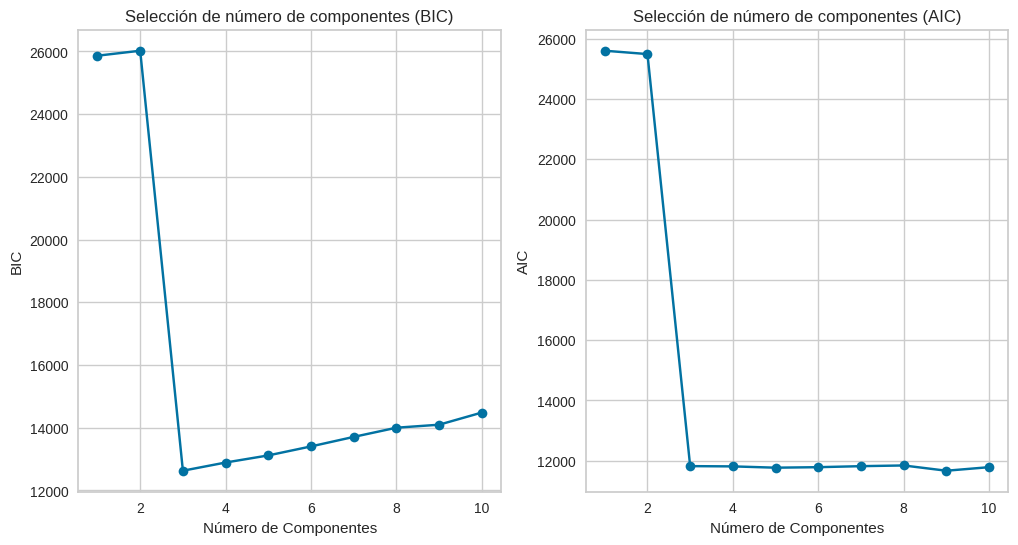

El número óptimo de componentes según BIC es: 3
El número óptimo de componentes según AIC es: 9


In [26]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt



# Inicializar listas para almacenar BIC y AIC
bic_scores = []
aic_scores = []
n_components_range = range(1, 11)  # Probar de 1 a 10 componentes

# Ajustar GMM para diferentes números de componentes
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(X_numerics_scaled)
    bic_scores.append(gmm.bic(X_numerics_scaled))
    aic_scores.append(gmm.aic(X_numerics_scaled))

# Visualizar el BIC y AIC para diferentes n_components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('BIC')
plt.title('Selección de número de componentes (BIC)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('AIC')
plt.title('Selección de número de componentes (AIC)')
plt.grid(True)

plt.show()

# El número óptimo de componentes será aquel que minimice el BIC o AIC
optimal_n_components_bic = n_components_range[np.argmin(bic_scores)]
optimal_n_components_aic = n_components_range[np.argmin(aic_scores)]

print(f"El número óptimo de componentes según BIC es: {optimal_n_components_bic}")
print(f"El número óptimo de componentes según AIC es: {optimal_n_components_aic}")


El siguiente código ajusta un modelo de **Gaussian Mixture Model (GMM)** a los datos escalados y luego predice las etiquetas (clusters) para cada observación.


In [27]:
# Ajustar el modelo GMM
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X_numerics_scaled)

# Predecir las etiquetas (clusters)
labels = gmm.predict(X_numerics_scaled)

In [28]:
cluster = pd.Series(labels)
data_gnn = data.copy()
data_gnn['cluster'] = cluster

In [29]:
data_gnn.head()

,id_empleado,edad,genero,nivel_educativo,cumplimiento_kpi,puntaje_productividad,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,evaluacion_liderazgo,antiguedad,promocion_ultimos_2_anos,categoria_desempeno,cluster
0,E0001,50,Femenino,Licenciatura,72,76,90,10,Medio,46,1.3,Baja,2,1,Medio,0
1,E0002,36,Femenino,Licenciatura,59,72,100,2,Alto,8,1.5,Media,14,1,Alto,0
2,E0003,29,Masculino,Secundaria,60,73,75,10,Medio,9,3.6,Media,16,0,Alto,2
3,E0004,42,Femenino,Doctorado,90,58,61,5,Medio,7,2.4,Baja,13,0,Medio,2
4,E0005,40,Femenino,Maestría,90,84,44,6,Bajo,20,3.8,Media,15,0,Bajo,2


Comprobación de tamaños de clústeres.

In [30]:
print(data_gnn['cluster'].value_counts())

cluster
2    441
1    345
0    214
Name: count, dtype: int64


## **8.3 Visualización de resultados de GNN**

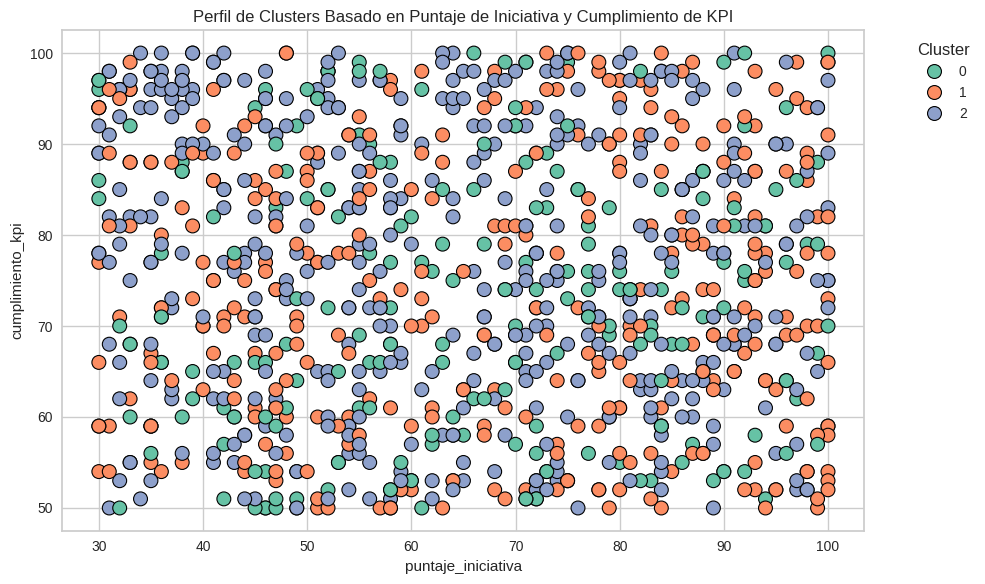

In [31]:
plt.figure(figsize=(10, 6))
pl = sns.scatterplot(
    data=data_gnn,
    x='puntaje_iniciativa',
    y='cumplimiento_kpi',
    hue='cluster',
    palette='Set2',
    s=100,
    edgecolor='black'
)
pl.set_title("Perfil de Clusters Basado en Puntaje de Iniciativa y Cumplimiento de KPI")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
import plotly.graph_objs as go
import plotly.offline as py

def tracer(db, cluster_id, name, x_col, y_col, z_col):
    '''
    Devuelve un objeto de seguimiento para Plotly basado en un cluster específico
    '''
    return go.Scatter3d(
        x = db[db['cluster'] == cluster_id][x_col],
        y = db[db['cluster'] == cluster_id][y_col],
        z = db[db['cluster'] == cluster_id][z_col],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
    )

# Seleccionar tres variables representativas
x_col = 'edad'
y_col = 'satisfaccion_laboral'
z_col = 'puntaje_productividad'

# Crear trazas para cada cluster
traces = []
for cluster_id in range(n_clusters):
    traces.append(tracer(data_gnn, cluster_id, f'Cluster {cluster_id}', x_col, y_col, z_col))

# Crear layout
layout = go.Layout(
    title = 'Clusters por GNN',
    scene = dict(
        xaxis = dict(title = 'Edad'),
        yaxis = dict(title = 'Satisfacción Laboral'),
        zaxis = dict(title = 'Puntaje de Productividad')
    )
)

# Crear figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar gráfico
py.offline.iplot(fig)


## **8.4 Insights u Observaciones (Sección 8)**

1. El modelo GMM identifica **3 clusters principales** según el criterio BIC, lo que sugiere una estructura clara y más compacta en los datos.  
2. El criterio AIC propone **9 clusters**, lo que refleja una segmentación más detallada pero con riesgo de sobreajuste.  
3. Los clusters detectados están relativamente **balanceados en tamaño**, evitando que un grupo concentre la mayoría de empleados.  
4. Las visualizaciones en 2D y 3D muestran que variables como **puntaje de iniciativa**, **cumplimiento de KPI** y **satisfacción laboral** son las que más contribuyen a la separación de grupos.  
5. Usar 3 clusters resulta más útil para el negocio, ya que simplifica la interpretación y permite definir estrategias diferenciadas sin perder robustez analítica.  


# **9 Comparación de modelos de clustering**

In [33]:
clusters = pd.concat([
    data_kmeans['Cluster'].value_counts().rename('KMeans'),
    data_dbscan['cluster'].value_counts().rename('DBSCAN'),
    data_gnn['cluster'].value_counts().rename('GMM')
], axis=1, sort=False)
clusters

,KMeans,DBSCAN,GMM
4,216.0,NaN,NaN
3,214.0,NaN,NaN
2,205.0,NaN,441.0
0,183.0,192.0,214.0
1,182.0,777.0,345.0
-1,NaN,31.0,NaN


## **9.1 Insights u Observaciones (Sección 9)**

1. **KMeans** generó 5 clusters bastante equilibrados en tamaño (entre 182 y 216 empleados), lo que facilita la interpretación y permite estrategias segmentadas de manera uniforme.  
2. **DBSCAN** detectó solo 2 clusters principales y un grupo de **outliers (31 empleados)**, lo que lo hace más sensible al ruido y útil para identificar casos atípicos.  
3. **GMM** identificó 3 clusters, también con tamaños balanceados (214, 345 y 441 empleados), ofreciendo una segmentación más compacta que KMeans pero sin descartar datos como DBSCAN.  
4. La comparación muestra que cada modelo aporta un valor distinto:  
   - KMeans -> Mejor balance y simplicidad.  
   - DBSCAN -> Enfoque en detectar ruido y patrones densos.  
   - GMM -> Flexibilidad para capturar distribuciones probabilísticas.  
5. Para propósitos de negocio, **KMeans y GMM resultan más prácticos** para segmentación general, mientras que **DBSCAN es clave para identificar empleados atípicos** o con características muy diferentes al resto.  


# **10. Estrategias y Recomendaciones**

## **10.1 Objetivo de negocio**
Usar los modelos de clustering para **segmentar empleados** y así **guiar decisiones de RR.HH.** en capacitación, bienestar y retención.  
El objetivo es **diseñar planes diferenciados según el perfil de cada grupo** y detectar casos atípicos que requieran atención especial.

## **10.2 Cómo usar los modelos**
1. **Modelo recomendado:**  
   - **KMeans (k=5):** ofrece una segmentación clara y balanceada.  
   - **DBSCAN:** útil para detectar **outliers** y perfiles atípicos.  
   - **GMM (k=3):** permite un enfoque probabilístico, ideal para empleados con características híbridas.  
2. **Entrada esperada:** variables numéricas del dataset, previamente **escaladas/normalizadas**.  
3. **Salida:** etiqueta de cluster asignada (y probabilidad en el caso de GMM).  
4. **Decisión:**  
   - Usar **KMeans** para definir la estrategia principal de segmentación.  
   - Consultar **DBSCAN** para intervenir en casos extremos o empleados fuera de norma.  
   - Usar **GMM** para perfiles que no encajan de forma rígida en un solo grupo.

## **10.3 Intervenciones sugeridas por cluster**
- **Cluster de bajo desempeño/satisfacción:**  
  - Plan de mejora individual (coaching, metas trimestrales, capacitación focalizada).  
- **Cluster medio o intermedio:**  
  - Micro-intervenciones (talleres cortos, feedback estructurado, seguimiento bimestral).  
- **Cluster alto desempeño/alto compromiso:**  
  - Estrategias de retención: reconocimiento, rol de mentor, proyectos desafiantes.  
- **Outliers detectados (DBSCAN):**  
  - Revisar caso por caso: pueden ser perfiles excepcionales (talento alto) o de riesgo (desempeño muy bajo).  

## **10.4 Estrategias específicas por modelo**
- **KMeans:**  
  - Sirve para el diseño de **programas generales** diferenciados por cluster.  
  - Ejemplo: asignar rutas de capacitación distintas a cada grupo.  
- **DBSCAN:**  
  - Enfocado en la **detección de anomalías**.  
  - Ejemplo: empleados fuera de la norma -> revisar si necesitan apoyo extra o si son casos de alto potencial.  
- **GMM:**  
  - Útil para perfiles con **características mixtas**.  
  - Ejemplo: un empleado que tiene alta productividad pero baja satisfacción laboral -> intervención balanceada.  

## **10.5 Métricas de éxito y monitoreo**
- **Modelo:** número y estabilidad de clusters, proporción de outliers, puntuación de silueta.  
- **Negocio:** reducción de empleados en clusters de bajo desempeño, mejora en satisfacción laboral, incremento en retención.  
- **RR.HH.:** participación en programas de formación, impacto de intervenciones por cluster.  

## **10.6 Posibles mejoras**
1. Probar con otros algoritmos de clustering (ej. **Agglomerative Clustering**).  
2. Ajustar hiperparámetros de DBSCAN y GMM para mayor estabilidad en los clusters.  
3. Usar **clustering híbrido** (KMeans inicial + GMM/DBSCAN para refinamiento).  
4. Incorporar variables adicionales de desempeño y clima laboral para enriquecer la segmentación.  
5. Automatizar el pipeline para **reentrenar cada 3–6 meses**.  

## **10.7 Resumen ejecutivo**
- **KMeans con k=5** es el modelo recomendado como base de segmentación.  
- **DBSCAN** se usa como herramienta de detección de casos extremos.  
- **GMM con k=3** ayuda a interpretar perfiles híbridos.  
- Las estrategias deben combinar **planes de capacitación, reconocimiento y retención**, priorizando según el cluster.  
- Es clave mantener un **monitoreo continuo** para adaptar las intervenciones a la evolución de los empleados.
